**단계 1:** 데이터를 생성하고 사용할 패키지를 불러오는 과정 

In [2]:
# SVM(Support Vector Machine)은 데이터 분석 중 분류에 이용되며 지도학습 방식의 모델입니다. 
# SVM에 대한 좋은 구현체는 사이킷-런(scikit-learn)인데, 이를 이용해 SVM에 대한 내용을 정리해 봅니다. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

# 먼저 학습을 위한 데이터를 생성합니다.
# scikit-learn은 데이터 분류를 목적으로 데이터를 생성해 주는 make_blobs라는 함수를 제공합니다. 
# 이를 이용해 아래처럼 2종류의 총 40개의 샘플 데이터를 생성합니다. 
X, y = make_blobs(n_samples=40, centers=2, random_state=20)

In [ ]:
**단계 2:** SVM 모델을 학습하고 분류

In [3]:
# SVM은 선형 분류와 비선형 분류를 지원, 선형 모델을 위해 kernel을 linear로 명시하였습니다.
# 비선형에 대한 kernel로는 rbf와 poly 등이 있습니다.

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [4]:
#학습된 SVM 모델을 통해 데이터 (3,4)를 분류하는 코드는 다음과 같습니다.

newData = [[3,4]]
print(clf.predict(newData))

[0]


In [ ]:
**단계 3:** 데이터 시각화

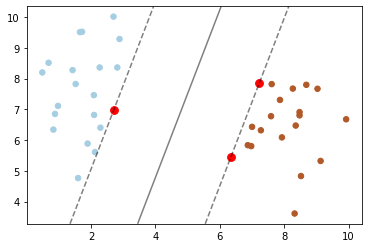

In [5]:
# 데이터를 시각화 합니다.
# 샘플 데이터와 초평면(Hyper-Plane), 지지벡터(Support Vector)를 그래프에 그리는 코드는 다음과 같습니다.

# 샘플 데이터 표현
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
 
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
 
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
 
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
 
plt.show()